# Week 6-10 영어 텍스트 군집 분석

In [1]:
# 데이터 읽기

import os
import pandas as pd

os.chdir(r'C:\Users\Administrator\Downloads\6주차_11일차,12일차_자연어처리\Week6 자연어처리 Data')
review_df=pd.read_csv("thinq_e_review_result.csv")

review_df

,date,star,like,comment,comment_n
0,"September 18, 2021",1,12.0,This app no longer works. It has just updated ...,"['app', 'longer', 'work', 'updated', 'tell', '..."
1,"September 19, 2021",1,NaN,Everything worked fine until a week or so ago....,"['everything', 'worked', 'fine', 'week', 'ago'..."
2,"September 18, 2021",2,6.0,App doesn't work with wired TV connection. EDI...,"['app', 'work', 'wired', 'tv', 'connection', '..."
3,"September 18, 2021",1,2.0,I'm trying this again by have Alexa connection...,"['trying', 'alexa', 'connection', 'turn', 'lg'..."
4,"September 1, 2021",1,104.0,"Just embarrassing. Absolutely, 100%, will not ...","['embarrassing', 'absolutely', 'connect', 'goo..."
...,...,...,...,...,...
11275,"June 6, 2019",5,NaN,Good app. useful so far,"['good', 'app', 'useful', 'far']"
11276,"November 9, 2020",5,NaN,Its been helpful. Hope it stays that way,"['helpful', 'hope', 'stay', 'way']"
11277,"July 17, 2020",5,NaN,Worked like it should and gave me feedback tha...,"['worked', 'like', 'gave', 'feedback', 'wanting']"
11278,"September 27, 2020",1,NaN,error routed device.. .,"['error', 'routed', 'device']"


In [2]:
review_df['comment_n_str']=review_df['comment_n'].apply(lambda x: " ".join(eval(x)))
review_df

,date,star,like,comment,comment_n,comment_n_str
0,"September 18, 2021",1,12.0,This app no longer works. It has just updated ...,"['app', 'longer', 'work', 'updated', 'tell', '...",app longer work updated tell login incorrect t...
1,"September 19, 2021",1,NaN,Everything worked fine until a week or so ago....,"['everything', 'worked', 'fine', 'week', 'ago'...",everything worked fine week ago connect oven a...
2,"September 18, 2021",2,6.0,App doesn't work with wired TV connection. EDI...,"['app', 'work', 'wired', 'tv', 'connection', '...",app work wired tv connection edit tried app tv...
3,"September 18, 2021",1,2.0,I'm trying this again by have Alexa connection...,"['trying', 'alexa', 'connection', 'turn', 'lg'...",trying alexa connection turn lg tv webos tv lg...
4,"September 1, 2021",1,104.0,"Just embarrassing. Absolutely, 100%, will not ...","['embarrassing', 'absolutely', 'connect', 'goo...",embarrassing absolutely connect google home de...
...,...,...,...,...,...,...
11275,"June 6, 2019",5,NaN,Good app. useful so far,"['good', 'app', 'useful', 'far']",good app useful far
11276,"November 9, 2020",5,NaN,Its been helpful. Hope it stays that way,"['helpful', 'hope', 'stay', 'way']",helpful hope stay way
11277,"July 17, 2020",5,NaN,Worked like it should and gave me feedback tha...,"['worked', 'like', 'gave', 'feedback', 'wanting']",worked like gave feedback wanting
11278,"September 27, 2020",1,NaN,error routed device.. .,"['error', 'routed', 'device']",error routed device


In [3]:
# TfidfVectorizer 사용한 DTM 생성
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(stop_words='english',ngram_range=(1,2), min_df=0.01,max_df=0.95)
feature_vect=tfidfv.fit_transform(review_df['comment_n_str'])

In [4]:
feature_vect

<11280x227 sparse matrix of type '<class 'numpy.float64'>'
	with 79965 stored elements in Compressed Sparse Row format>

In [5]:
from sklearn.cluster import KMeans

# 10개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=10, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [6]:
print(cluster_label)
print(cluster_centers)

[9 0 1 ... 0 0 8]
[[0.01488992 0.00059689 0.00383787 ... 0.0264184  0.00780103 0.00405561]
 [0.01406647 0.0003096  0.00771468 ... 0.01532245 0.00484595 0.00552729]
 [0.00758599 0.00319418 0.00371049 ... 0.00208112 0.         0.00081371]
 ...
 [0.01937527 0.00038535 0.00559166 ... 0.01303416 0.00335517 0.00353078]
 [0.02062012 0.00384951 0.01330696 ... 0.01414313 0.00342675 0.00420965]
 [0.00631044 0.00177804 0.00357525 ... 0.01003128 0.00172398 0.003653  ]]


In [7]:
cluster_centers.shape

(10, 227)

In [8]:
review_df['cluster_label'] = cluster_label
review_df.head()

,date,star,like,comment,comment_n,comment_n_str,cluster_label
0,"September 18, 2021",1,12.0,This app no longer works. It has just updated ...,"['app', 'longer', 'work', 'updated', 'tell', '...",app longer work updated tell login incorrect t...,9
1,"September 19, 2021",1,NaN,Everything worked fine until a week or so ago....,"['everything', 'worked', 'fine', 'week', 'ago'...",everything worked fine week ago connect oven a...,0
2,"September 18, 2021",2,6.0,App doesn't work with wired TV connection. EDI...,"['app', 'work', 'wired', 'tv', 'connection', '...",app work wired tv connection edit tried app tv...,1
3,"September 18, 2021",1,2.0,I'm trying this again by have Alexa connection...,"['trying', 'alexa', 'connection', 'turn', 'lg'...",trying alexa connection turn lg tv webos tv lg...,1
4,"September 1, 2021",1,104.0,"Just embarrassing. Absolutely, 100%, will not ...","['embarrassing', 'absolutely', 'connect', 'goo...",embarrassing absolutely connect google home de...,6


In [9]:
review_df[review_df['cluster_label']==0].sort_values(by='comment_n_str')

,date,star,like,comment,comment_n,comment_n_str,cluster_label
11241,"October 28, 2018",1,NaN,Not at aal good even account cannot be opened,"['aal', 'good', 'even', 'account', 'opened']",aal good even account opened,0
4033,"September 22, 2020",3,1.0,Where has the ability to add users to a device...,"['ability', 'add', 'user', 'device', 'gone', '...",ability add user device gone latest app update...,0
1380,"May 31, 2021",3,1.0,"There is no ability to control ""5 in 1"" or ""am...","['ability', 'control', 'amp', 'control', 'feat...",ability control amp control feature split unit,0
1266,"June 19, 2021",3,NaN,Doesn't have the ability to record what your w...,"['ability', 'record', 'watching', 'via', 'app'...",ability record watching via app surely pretty ...,0
6218,"November 1, 2020",4,NaN,Having the ability to use this app as my T.V. ...,"['ability', 'use', 'app', 'v', 'remote', 'usef...",ability use app v remote useful thing ever som...,0
...,...,...,...,...,...,...,...
10795,"May 1, 2021",1,NaN,This is yet another bleep app that is watching...,"['yet', 'another', 'bleep', 'app', 'watching',...",yet another bleep app watching sell informatio...,0
6394,"October 24, 2020",5,NaN,I have yet to have a bad experience with this ...,"['yet', 'bad', 'experience', 'app', 'notificat...",yet bad experience app notification time help ...,0
10826,"May 3, 2020",1,NaN,Not yet good app not working properly.,"['yet', 'good', 'app', 'working', 'properly']",yet good app working properly,0
7818,"September 10, 2020",1,NaN,ZERO STARS. WASTE OF TIME. QR codes do Not sca...,"['zero', 'star', 'waste', 'time', 'qr', 'code'...",zero star waste time qr code scan trash app,0


In [10]:
review_df[review_df['cluster_label']==1].sort_values(by='comment_n_str')

,date,star,like,comment,comment_n,comment_n_str,cluster_label
8718,"February 14, 2020",4,NaN,I cannot able change the channels for tv.. But...,"['able', 'change', 'channel', 'tv', 'volume', ...",able change channel tv volume mute etc working,1
10070,"September 26, 2020",1,NaN,Not able to connect my google nest with LG tv,"['able', 'connect', 'google', 'nest', 'lg', 'tv']",able connect google nest lg tv,1
2993,"October 27, 2020",2,5.0,"I am able to control my tv using my phone, tha...","['able', 'control', 'tv', 'using', 'phone', 'o...",able control tv using phone one good thing cas...,1
9157,"December 18, 2020",5,NaN,I am able to controll my LG TV with my device(s).,"['able', 'controll', 'lg', 'tv', 'device']",able controll lg tv device,1
9023,"April 25, 2020",1,2.0,We not able to play mobile contents in this ap...,"['able', 'play', 'mobile', 'content', 'app', '...",able play mobile content app lg tv plus better...,1
...,...,...,...,...,...,...,...
7345,"August 12, 2020",1,NaN,Yep rather useless and what happened to being ...,"['yep', 'rather', 'useless', 'happened', 'able...",yep rather useless happened able enter text tv...,1
4495,"February 3, 2021",1,2.0,Yet another app for smart devices. Why should ...,"['yet', 'another', 'app', 'smart', 'device', '...",yet another app smart device keep another app ...,1
17,"September 18, 2021",1,NaN,It's been more than 2 yrs without any sensed c...,"['yr', 'without', 'sensed', 'change', 'app', '...",yr without sensed change app allows turn tv ev...,1
2054,"May 29, 2021",1,NaN,There is no Zero. Cannot connectmy phone. The ...,"['zero', 'connectmy', 'phone', 'registration',...",zero connectmy phone registration screen timea...,1


In [11]:
review_df[review_df['cluster_label']==9].sort_values(by='comment_n_str')

,date,star,like,comment,comment_n,comment_n_str,cluster_label
4136,"December 22, 2020",3,NaN,Was able to get connected and it works well. N...,"['able', 'get', 'connected', 'work', 'well', '...",able get connected work well notification oven...,9
9504,"June 11, 2020",1,NaN,Not able to make it work with Alexa,"['able', 'make', 'work', 'alexa']",able make work alexa,9
5018,"September 23, 2020",1,2.0,"Absolute rubbish, doesn't detect the tv anymor...","['absolute', 'rubbish', 'detect', 'tv', 'anymo...",absolute rubbish detect tv anymore work old ap...,9
4708,"January 20, 2019",1,1.0,absolutely awful. I have a masters degree in I...,"['absolutely', 'awful', 'master', 'degree', 's...",absolutely awful master degree spent hour phon...,9
10800,"June 12, 2019",5,NaN,Absolutely love my LG Washer!!! App works grea...,"['absolutely', 'love', 'lg', 'washer', 'app', ...",absolutely love lg washer app work great,9
...,...,...,...,...,...,...,...
10455,"January 11, 2020",5,NaN,Wow awesome application am very happy it works...,"['wow', 'awesome', 'application', 'happy', 'wo...",wow awesome application happy work,9
7011,"March 21, 2021",5,NaN,"Wow, love the app. Very useful and works well ...","['wow', 'love', 'app', 'useful', 'work', 'well...",wow love app useful work well appliance great ...,9
3343,"March 18, 2020",1,1.0,"In all my years of dev work, I've never seen a...","['year', 'dev', 'work', 'never', 'seen', 'app'...",year dev work never seen app work rooted devic...,9
10546,"April 29, 2021",5,NaN,Not yet download this app😂but I know it will w...,"['yet', 'download', 'app', 'know', 'work', 'sm...",yet download app know work smoothly without clash,9


In [12]:
# 군집별 핵심 단어 추출하기
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (10, 227)
[[0.01488992 0.00059689 0.00383787 ... 0.0264184  0.00780103 0.00405561]
 [0.01406647 0.0003096  0.00771468 ... 0.01532245 0.00484595 0.00552729]
 [0.00758599 0.00319418 0.00371049 ... 0.00208112 0.         0.00081371]
 ...
 [0.01937527 0.00038535 0.00559166 ... 0.01303416 0.00335517 0.00353078]
 [0.02062012 0.00384951 0.01330696 ... 0.01414313 0.00342675 0.00420965]
 [0.00631044 0.00177804 0.00357525 ... 0.01003128 0.00172398 0.003653  ]]


In [13]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        
    return cluster_details

In [14]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('='*120)

In [15]:
feature_names = tfidfv.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=review_df,
                                  feature_names=feature_names, clusters_num=10, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['app', 'lg', 'good', 'update', 'time', 'great', 'use', 'working', 'appliance', 'review']
####### Cluster 1
Top features: ['tv', 'lg', 'app', 'lg tv', 'remote', 'tv remote', 'turn', 'use', 'phone', 'plus']
####### Cluster 2
Top features: ['easy', 'easy use', 'use', 'app', 'helpful', 'great', 'good', 'useful', 'setup', 'set']
####### Cluster 3
Top features: ['ac', 'app', 'wifi', 'unit', 'time', 'connect', 'lg', 'control', 'option', 'temperature']
####### Cluster 4
Top features: ['rooted', 'rooted device', 'device', 'run rooted', 'run', 'phone', 'app', 'work', 'say', 'reason']
####### Cluster 5
Top features: ['permission', 'location', 'need', 'phone', 'access', 'app', 'make', 'requires', 'want', 'use']
####### Cluster 6
Top features: ['connect', 'tv', 'connect tv', 'app', 'wifi', 'lg', 'time', 'google', 'home', 'google home']
####### Cluster 7
Top features: ['washer', 'dryer', 'washer dryer', 'app', 'cycle', 'review', 'start', 'notification', 'lg', 'work']

C:\Users\Administrator\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
review_df

,date,star,like,comment,comment_n,comment_n_str,cluster_label
0,"September 18, 2021",1,12.0,This app no longer works. It has just updated ...,"['app', 'longer', 'work', 'updated', 'tell', '...",app longer work updated tell login incorrect t...,9
1,"September 19, 2021",1,NaN,Everything worked fine until a week or so ago....,"['everything', 'worked', 'fine', 'week', 'ago'...",everything worked fine week ago connect oven a...,0
2,"September 18, 2021",2,6.0,App doesn't work with wired TV connection. EDI...,"['app', 'work', 'wired', 'tv', 'connection', '...",app work wired tv connection edit tried app tv...,1
3,"September 18, 2021",1,2.0,I'm trying this again by have Alexa connection...,"['trying', 'alexa', 'connection', 'turn', 'lg'...",trying alexa connection turn lg tv webos tv lg...,1
4,"September 1, 2021",1,104.0,"Just embarrassing. Absolutely, 100%, will not ...","['embarrassing', 'absolutely', 'connect', 'goo...",embarrassing absolutely connect google home de...,6
...,...,...,...,...,...,...,...
11275,"June 6, 2019",5,NaN,Good app. useful so far,"['good', 'app', 'useful', 'far']",good app useful far,0
11276,"November 9, 2020",5,NaN,Its been helpful. Hope it stays that way,"['helpful', 'hope', 'stay', 'way']",helpful hope stay way,0
11277,"July 17, 2020",5,NaN,Worked like it should and gave me feedback tha...,"['worked', 'like', 'gave', 'feedback', 'wanting']",worked like gave feedback wanting,0
11278,"September 27, 2020",1,NaN,error routed device.. .,"['error', 'routed', 'device']",error routed device,0


In [17]:
# Dimension Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(feature_vect.toarray())
review_df['ftr1'] = pca_transformed[:,0]
review_df['ftr2'] = pca_transformed[:,1]

In [18]:
### Function to visualize clustering results  
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*','P','D','H','v','>','<','1','2','3','4']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[0])  #label
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper right'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()


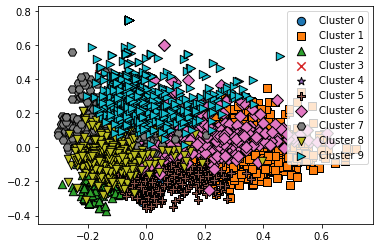

In [19]:
visualize_cluster_plot(km_cluster, review_df, 'cluster_label', iscenter=False)

In [24]:
#DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.85, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(feature_vect)

MemoryError: 

In [21]:
review_df['dbscan_cluster'] = dbscan_labels

NameError: name 'dbscan_labels' is not defined

In [22]:
review_df['dbscan_cluster'].value_counts()

KeyError: 'dbscan_cluster'

In [23]:
visualize_cluster_plot(dbscan, review_df, 'dbscan_cluster', iscenter=False)

KeyError: 'dbscan_cluster'

In [ ]:
review_df[review_df['dbscan_cluster']==4].sort_values(by='comment_n_str')

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(feature_vect)

In [ ]:
review_df['dbscan_cluster'] = dbscan_labels

In [ ]:
review_df['dbscan_cluster'].value_counts()